In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [2]:
##import and concatenate datasets
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/Sapelo/Yearly data'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Yearly data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
#     print(df)

df

,B1,B2,B3,B4,B5,B6,B7,system:index,Site,Species_Code,...,Quadrat_Area,Zone,Plot,Latitude,Plant_Biomass,Sample_Size,Longitude,Date,B10,B11
0,0.0271,0.0301,0.0309,0.0551,0.0357,0.2911,0.0289,0,1,A1,...,0.25,1,1,31.538627,516.324,23,-81.422539,10/11/2000,NaN,NaN
1,0.0339,0.0488,0.0459,0.0952,0.0691,0.2915,0.0376,1,2,A1,...,0.25,1,1,31.536199,1152.400,21,-81.296118,10/11/2000,NaN,NaN
2,0.0358,0.0578,0.0494,0.1039,0.0690,0.2920,0.0332,2,3,A1,...,0.25,1,1,31.518920,710.396,20,-81.228956,10/18/2000,NaN,NaN
3,0.0315,0.0393,0.0421,0.0773,0.0630,0.2920,0.0332,3,4,A1,...,0.25,1,1,31.451676,1534.304,25,-81.365498,10/10/2000,NaN,NaN
4,0.0314,0.0533,0.0495,0.1394,0.1024,0.2911,0.0549,4,5,A1,...,0.25,1,1,31.436090,2022.264,25,-81.339919,10/10/2000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,0.0193,0.0247,0.0397,0.0358,0.0885,0.0635,0.0347,172,4,A1,...,0.25,1,56,31.451282,820.556,12,-81.366151,10/4/2019,0.2977,0.2949
3212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173,2,A1,...,0.25,1,58,31.535648,210.604,15,-81.295100,10/11/2019,NaN,NaN
3213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174,2,A1,...,0.25,1,62,31.536196,424.300,15,-81.295883,10/11/2019,NaN,NaN
3214,0.0297,0.0381,0.0532,0.0484,0.0789,0.0530,0.0265,175,6,A1,...,0.25,1,64,31.388000,295.636,8,-81.279858,10/9/2019,0.2980,0.2949


In [3]:
df['Sensor'] = np.where(df['Year']<2013, 'Landsat 5', 'Landsat 8') ##make sure no other sensors are being used

df['ndvi'] = np.where(df['Sensor'] == 'Landsat 5', (df['B4']-df['B3'])/(df['B4']+df['B3']), \
                      (df['B5']-df['B4'])/(df['B5']+df['B4'])) ##ndvi conditional based on whether sensor is Landsat-5 or 8

df['Blue_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B1'], df['B2'])
df['Green_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B2'], df['B3'])
df['Red_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B3'], df['B4'])
df['NIR_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B4'], df['B5'])
df['SWIR1_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B5'], df['B6'])
df['SWIR2_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B7'], df['B7'])

##IMPORTANT: again, these bands between landsat 5 and 8 may not be able to be compared directly


##Variables from Byrd et al. 2018:
df['savi'] = np.where(df['Sensor'] == 'Landsat 5', ((df['B4']-df['B3'])*1.5)/(df['B4']+df['B3']+0.5), \
                      ((df['B5']-df['B4'])*1.5)/(df['B5']+df['B4']+0.5))

df['wdrvi5'] = np.where(df['Sensor'] == 'Landsat 5', (0.5*df['B4']-df['B3'])/(0.5*df['B4']+df['B3']), \
                      (0.5*df['B5']-df['B4'])/(0.5*df['B5']+df['B4']))

df['nd_r_g'] = np.where(df['Sensor'] == 'Landsat 5', (df['B3']-df['B2'])/(df['B3']+df['B2']), \
                      (df['B4']-df['B3'])/(df['B4']+df['B3']))

df['nd_g_b'] = np.where(df['Sensor'] == 'Landsat 5', (df['B2']-df['B1'])/(df['B2']+df['B1']), \
                      (df['B3']-df['B2'])/(df['B3']+df['B2']))

df['nd_swir2_nir'] = np.where(df['Sensor'] == 'Landsat 5', (df['B7']-df['B4'])/(df['B7']+df['B4']), \
                      (df['B7']-df['B5'])/(df['B7']+df['B5']))

df['nd_swir2_r'] = np.where(df['Sensor'] == 'Landsat 5', (df['B7']-df['B3'])/(df['B7']+df['B3']), \
                      (df['B7']-df['B4'])/(df['B7']+df['B4']))

##There was an easy way to do the section above without using the where function (use columns from first part like red_band)
##COMPARE!!!

dfx = df
dfx['savi'] = ((df['NIR_band']-df['Red_band'])*1.5)/(df['NIR_band']+df['Red_band']+0.5)
dfx['wdrvi5'] = (0.5*df['NIR_band']-df['Red_band'])/(0.5*df['NIR_band']+df['Red_band'])
dfx['nd_r_g'] = (df['Red_band']-df['Green_band'])/(df['Red_band']+df['Green_band'])
dfx['nd_g_b'] = (df['Green_band']-df['Blue_band'])/(df['Green_band']+df['Blue_band'])
dfx['nd_swir2_nir'] = (df['SWIR2_band']-df['NIR_band'])/(df['SWIR2_band']+df['NIR_band'])
dfx['nd_swir2_r'] = (df['SWIR2_band']-df['Red_band'])/(df['SWIR2_band']+df['Red_band'])

dfx
df

,B1,B2,B3,B4,B5,B6,B7,system:index,Site,Species_Code,...,Red_band,NIR_band,SWIR1_band,SWIR2_band,savi,wdrvi5,nd_r_g,nd_g_b,nd_swir2_nir,nd_swir2_r
0,0.0271,0.0301,0.0309,0.0551,0.0357,0.2911,0.0289,0,1,A1,...,0.0309,0.0551,0.0357,0.0289,0.061945,-0.057314,0.013115,0.052448,-0.311905,-0.033445
1,0.0339,0.0488,0.0459,0.0952,0.0691,0.2915,0.0376,1,2,A1,...,0.0459,0.0952,0.0691,0.0376,0.115349,0.018182,-0.030623,0.180169,-0.433735,-0.099401
2,0.0358,0.0578,0.0494,0.1039,0.0690,0.2920,0.0332,2,3,A1,...,0.0494,0.1039,0.0690,0.0332,0.125134,0.025160,-0.078358,0.235043,-0.515682,-0.196126
3,0.0315,0.0393,0.0421,0.0773,0.0630,0.2920,0.0332,3,4,A1,...,0.0421,0.0773,0.0630,0.0332,0.085244,-0.042724,0.034398,0.110169,-0.399095,-0.118194
4,0.0314,0.0533,0.0495,0.1394,0.1024,0.2911,0.0549,4,5,A1,...,0.0495,0.1394,0.1024,0.0549,0.195747,0.169463,-0.036965,0.258560,-0.434894,0.051724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,0.0193,0.0247,0.0397,0.0358,0.0885,0.0635,0.0347,172,4,A1,...,0.0358,0.0885,0.0635,0.0347,0.126622,0.105559,-0.051656,0.232919,-0.436688,-0.015603
3212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173,2,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174,2,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3214,0.0297,0.0381,0.0532,0.0484,0.0789,0.0530,0.0265,175,6,A1,...,0.0484,0.0789,0.0530,0.0265,0.072932,-0.101878,-0.047244,0.165389,-0.497154,-0.292390


In [4]:
# g = df.plot(kind = 'scatter', x = 'nd_swir2_r', y = 'Plant_Biomass')

# g
# for col in df.columns:
#     print(col)

In [6]:
##First go at machine learning, using the methods of Byrd et al 2018

##Need (from table 3)=: SAVI, normalized difference green/blue index, wide dynamic range vegetation index 5, ndvi red/green, \
##  ndvi swir2/nir, ndvi swir2/red, site? (site may be important when combining GA, VA, and MA data)

##Random Forest test! REMEMBER: by combining landsat 5 and 8 bands, you are grouping bands with slightly different wavelengths. 
##ONLY INDICES to account for this?

df = df[df['ndvi'].notna()] ##remove rows with NaN for columns used in the model 

from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##needs so much work
#df.fillna(df.mean(), inplace=True) ##getting rid of NaN values, but not sure if this is okay

xargs=df[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi']] 
yargs=df['Plant_Biomass'] 

# ##Split dataset into training set and test set
# seed = 7
# test_size = 0.33
# xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=test_size, random_state=seed)
# ##Not sure what random_state = seed does

# ##fit model no training data
# model = XGBClassifier()
# model.fit(xargs_train, yargs_train)
# print(model)

# ##make predictions for test data
# y_pred = model.predict(xargs_test)
# predictions = [round(value) for value in y_pred]

# accuracy = accuracy_score(yargs_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=0.3) ## 70% training and 30% test

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

##Create a Gaussian Classifier
reg_x=RandomForestRegressor(n_estimators=100, random_state = 0) ##Not sure what random_state = 0 does

##Train the model using the training sets y_pred=clf.predict(X_test)
reg_x.fit(xargs_train, yargs_train)
y_pred=reg_x.predict(xargs_test)

score(xargs, y_pred)

X_grid = np.arange(min(xargs),max(xargs),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(xargs,yargs, color='red') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='blue') #plotting for predict points
plt.show()

NameError: name 'score' is not defined

In [7]:
##From: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

xargs = df[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi']]
yargs = df['Plant_Biomass']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xargs, yargs, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r_square = metrics.r2_score(y_test, y_pred)
print(r_square) ##pretty low (0.29), all things considered
print(regressor.score(X_test, y_test)) ##same as above, why?

Mean Absolute Error: 395.41424951725105
Mean Squared Error: 347499.23948703066
Root Mean Squared Error: 589.4906610685454
0.29219955424726163
0.29219955424726163


In [8]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
#     print(df)

In [9]:
# plt.scatter(xargs,yargs, color='red') ##plotting real points
df['Plant_Biomass'].describe()


count    2615.000000
mean      749.928014
std       675.390553
min         0.000000
25%       307.084000
50%       543.760000
75%       958.776000
max      6121.344000
Name: Plant_Biomass, dtype: float64

ValueError: x and y must be the same size

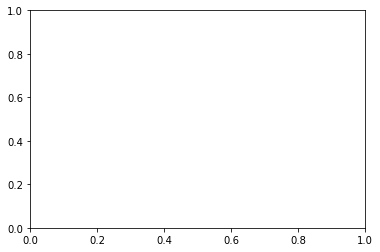

In [16]:
##Visualization

plt.scatter(xargs,yargs, color='red') ##plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='blue') ##plotting for predict points
plt.show()

X_val = np.arange(min(X_train), max(X_train), 0.01)
X_val = X_val.reshape((len(X_val), 1))
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.show()

In [25]:
print(len(xargs))
print(len(yargs))

xargs


2615
2615


NameError: name 'X_grid' is not defined